<a href="https://colab.research.google.com/github/Viny2030/sklearn/blob/main/trees_classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a classification decision tree

In this notebook we illustrate decision trees in a multiclass classification
problem by using the penguins dataset with 2 features and 3 classes.

For the sake of simplicity, we focus the discussion on the hyperparamter
`max_depth`, which controls the maximal depth of the decision tree.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Construir un árbol de decisión de clasificación
En este cuaderno ilustramos árboles de decisión en un problema de clasificación multiclase utilizando el conjunto de datos de pingüinos con 2 características y 3 clases.

Para simplificar, centramos la discusión en el hiperparámetro max_depth, que controla la profundidad máxima del árbol de decisión.

Nota

Si desea una descripción más detallada de este conjunto de datos, puede consultar la sección Apéndice - Descripción de conjuntos de datos al final de este MOOC.

In [21]:
import pandas as pd

penguins = pd.read_csv("https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/penguins_lter.csv")
culmen_columns = penguins[["Culmen Length (mm)", "Culmen Depth (mm)"]]
target_column =penguins["Species"]

In [22]:
culmen_columns

,Culmen Length (mm),Culmen Depth (mm)
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3
...,...,...
339,NaN,NaN
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [23]:
target_column

,Species
0,Adelie Penguin (Pygoscelis adeliae)
1,Adelie Penguin (Pygoscelis adeliae)
2,Adelie Penguin (Pygoscelis adeliae)
3,Adelie Penguin (Pygoscelis adeliae)
4,Adelie Penguin (Pygoscelis adeliae)
...,...
339,Gentoo penguin (Pygoscelis papua)
340,Gentoo penguin (Pygoscelis papua)
341,Gentoo penguin (Pygoscelis papua)
342,Gentoo penguin (Pygoscelis papua)


In [12]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [18]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

First, we split the data into two subsets to investigate how trees predict
values based on unseen data.

In [27]:
penguins.fillna(0, inplace=True)

In [28]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   344 non-null    float64
 10  Culmen Depth (mm)    344 non-null    float64
 11  Flipper Length (mm)  344 non-null    float64
 12  Body Mass (g)        344 non-null    float64
 13  Sex                  344 non-null    object 
 14  Delta 15 N (o/oo)    344 non-null    float64
 15  Delta 13 C (o/oo)    344 non-null    flo

In [29]:
culmen_columns = penguins[["Culmen Length (mm)", "Culmen Depth (mm)"]]
target_column =penguins["Species"]

Primero, dividimos los datos en dos subconjuntos para investigar cómo los árboles predicen valores basados ​​en datos no vistos.

In [30]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns.columns], penguins[target_column.name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

In a previous notebook, we learnt that linear classifiers define a linear
separation to split classes using a linear combination of the input features.
In our 2-dimensional feature space, it means that a linear classifier finds
the oblique lines that best separate the classes. This is still true for
multiclass problems, except that more than one line is fitted. We can use
`DecisionBoundaryDisplay` to plot the decision boundaries learnt by the
classifier.

En un cuaderno anterior, aprendimos que los clasificadores lineales definen una separación lineal para dividir las clases utilizando una combinación lineal de las características de entrada. En nuestro espacio de características bidimensional, significa que un clasificador lineal encuentra las líneas oblicuas que mejor separan las clases. Esto sigue siendo cierto para los problemas multiclase, excepto que se ajusta más de una línea. Podemos usar DecisionBoundaryDisplay para trazar los límites de decisión aprendidos por el clasificador.


In [31]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(data_train, target_train)

LogisticRegression()

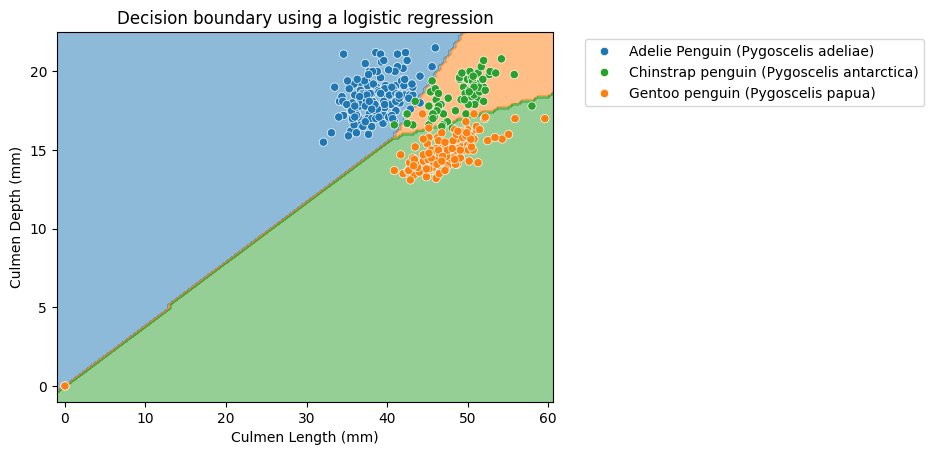

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay

tab10_norm = mpl.colors.Normalize(vmin=-0.5, vmax=8.5)
# create a palette to be used in the scatterplot
palette = ["tab:blue", "tab:green", "tab:orange"]

dbd = DecisionBoundaryDisplay.from_estimator(
    linear_model,
    data_train,
    response_method="predict",
    cmap="tab10",
    norm=tab10_norm,
    alpha=0.5,
)
sns.scatterplot(
    data=penguins,
    x=culmen_columns.columns[0],  # Access column name using .columns
    y=culmen_columns.columns[1],  # Access column name using .columns
    hue=target_column,
    palette=palette,
)
# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a logistic regression")

We see that the lines are a combination of the input features since they are
not perpendicular a specific axis. Indeed, this is due to the model
parametrization that we saw in some previous notebooks, i.e. controlled by the
model's weights and intercept.

Besides, it seems that the linear model would be a good candidate for such
problem as it gives good accuracy.

Vemos que las líneas son una combinación de las características de entrada, ya que no son perpendiculares a un eje específico. De hecho, esto se debe a la parametrización del modelo que vimos en algunos cuadernos anteriores, es decir, controlada por los pesos y la intersección del modelo.

Además, parece que el modelo lineal sería un buen candidato para este problema, ya que ofrece una buena precisión.

In [34]:
linear_model.fit(data_train, target_train)
test_score = linear_model.score(data_test, target_test)
print(f"Accuracy of the LogisticRegression: {test_score:.2f}")

Accuracy of the LogisticRegression: 0.98


Unlike linear models, the decision rule for the decision tree is not
controlled by a simple linear combination of weights and feature values.

Instead, the decision rules of trees can be defined in terms of
- the feature index used at each split node of the tree,
- the threshold value used at each split node,
- the value to predict at each leaf node.

Decision trees partition the feature space by considering a single feature at
a time. The number of splits depends on both the hyperparameters and the
number of data points in the training set: the more flexible the
hyperparameters and the larger the training set, the more splits can be
considered by the model.

As the number of adjustable components taking part in the decision rule
changes with the training size, we say that decision trees are non-parametric
models.

Let's now visualize the shape of the decision boundary of a decision tree when
we set the `max_depth` hyperparameter to only allow for a single split to
partition the feature space.

A diferencia de los modelos lineales, la regla de decisión para el árbol de decisión no está controlada por una simple combinación lineal de pesos y valores de características.

En cambio, las reglas de decisión de los árboles se pueden definir en términos de

el índice de característica utilizado en cada nodo dividido del árbol,
el valor umbral utilizado en cada nodo dividido,
el valor a predecir en cada nodo de hoja.
Los árboles de decisión dividen el espacio de características considerando una sola característica a la vez. La cantidad de divisiones depende tanto de los hiperparámetros como de la cantidad de puntos de datos en el conjunto de entrenamiento: cuanto más flexibles sean los hiperparámetros y más grande el conjunto de entrenamiento, más divisiones puede considerar el modelo.

Como la cantidad de componentes ajustables que participan en la regla de decisión cambia con el tamaño del entrenamiento, decimos que los árboles de decisión son modelos no paramétricos.

Ahora visualicemos la forma del límite de decisión de un árbol de decisión cuando configuramos el hiperparámetro max_depth para permitir solo una división para dividir el espacio de características.


In [35]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=1)

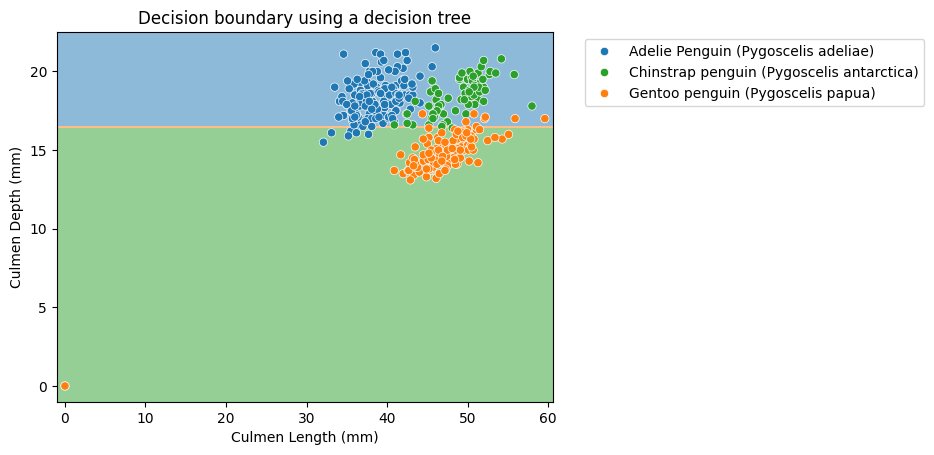

In [37]:
DecisionBoundaryDisplay.from_estimator(
    tree,
    data_train,
    response_method="predict",
    cmap="tab10",
    norm=tab10_norm,
    alpha=0.5,
)
sns.scatterplot(
    data=penguins,
    x=culmen_columns.columns[0],  # Access column name using .columns
    y=culmen_columns.columns[1],  # Access column name using .columns
    hue=target_column,
    palette=palette,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a decision tree")

The partitions found by the algorithm separates the data along the axis
"Culmen Depth", discarding the feature "Culmen Length". Thus, it highlights
that a decision tree does not use a combination of features when making a
single split. We can look more in depth at the tree structure.

Las particiones encontradas por el algoritmo separan los datos a lo largo del eje “Culmen Depth”, descartando la característica “Culmen Length”. De esta forma, se pone de manifiesto que un árbol de decisión no utiliza una combinación de características al realizar una única división. Podemos observar con más profundidad la estructura del árbol.

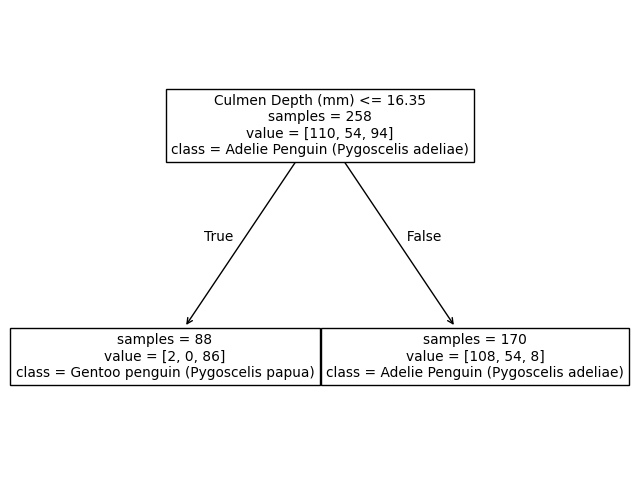

In [39]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(
    tree,
    feature_names=culmen_columns.columns, # Changed to access column names as a list
    class_names=tree.classes_.tolist(),
    impurity=False,
    ax=ax,
)

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">We are using the function <tt class="docutils literal">fig, ax = <span class="pre">plt.subplots(figsize=(8,</span> 6))</tt> to create
a figure and an axis with a specific size. Then, we can pass the axis to the
<tt class="docutils literal">sklearn.tree.plot_tree</tt> function such that the drawing happens in this axis.</p>
</div>

# Consejo

Utilizamos la función fig, ax = plt.subplots(figsize=(8, 6)) para crear una figura y un eje con un tamaño específico. Luego, podemos pasar el eje a la función sklearn.tree.plot_tree para que el dibujo se realice en este eje.

We see that the split was done on the culmen depth feature. The original
dataset was subdivided into 2 sets based on the culmen depth (inferior or
superior to 16.45 mm).

This partition of the dataset minimizes the class diversity in each
sub-partitions. This measure is also known as a **criterion**, and is a
settable parameter.

If we look more closely at the partition, we see that the sample superior to
16.45 belongs mainly to the "Adelie" class. Looking at the values, we indeed
observe 103 "Adelie" individuals in this space. We also count 52 "Chinstrap"
samples and 6 "Gentoo" samples. We can make similar interpretation for the
partition defined by a threshold inferior to 16.45mm. In this case, the most
represented class is the "Gentoo" species.

Let's see how our tree would work as a predictor. Let's start with a case
where the culmen depth is inferior to the threshold.

Vemos que la división se realizó en función de la profundidad del culmen. El conjunto de datos original se subdividió en 2 conjuntos en función de la profundidad del culmen (inferior o superior a 16,45 mm).

Esta partición del conjunto de datos minimiza la diversidad de clases en cada subpartición. Esta medida también se conoce como criterio y es un parámetro configurable.

Si observamos más de cerca la partición, vemos que la muestra superior a 16,45 pertenece principalmente a la clase "Adelia". Al observar los valores, observamos de hecho 103 individuos "Adelia" en este espacio. También contamos 52 muestras "Chinstrap" y 6 muestras "Gentoo". Podemos hacer una interpretación similar para la partición definida por un umbral inferior a 16,45 mm. En este caso, la clase más representada es la especie "Gentoo".

Veamos cómo funcionaría nuestro árbol como predictor. Empecemos con un caso en el que la profundidad del culmen es inferior al umbral.



In [40]:
test_penguin_1 = pd.DataFrame(
    {"Culmen Length (mm)": [0], "Culmen Depth (mm)": [15]}
)
tree.predict(test_penguin_1)

array(['Gentoo penguin (Pygoscelis papua)'], dtype=object)

The class predicted is the "Gentoo". We can now check what happens if we pass a
culmen depth superior to the threshold.

La clase predicha es "Gentoo". Ahora podemos comprobar qué ocurre si pasamos una profundidad de culmen superior al umbral.

In [41]:
test_penguin_2 = pd.DataFrame(
    {"Culmen Length (mm)": [0], "Culmen Depth (mm)": [17]}
)
tree.predict(test_penguin_2)

array(['Adelie Penguin (Pygoscelis adeliae)'], dtype=object)

In this case, the tree predicts the "Adelie" specie.

Thus, we can conclude that a decision tree classifier predicts the most
represented class within a partition.

During the training, we have a count of samples in each partition, we can also
compute the probability of belonging to a specific class within this
partition.

En este caso, el árbol predice la especie "Adelia".

Por lo tanto, podemos concluir que un clasificador de árbol de decisión predice la clase más representada dentro de una partición.

Durante el entrenamiento, tenemos un recuento de muestras en cada partición, también podemos calcular la probabilidad de pertenecer a una clase específica dentro de esta partición.

In [42]:
y_pred_proba = tree.predict_proba(test_penguin_2)
y_proba_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)

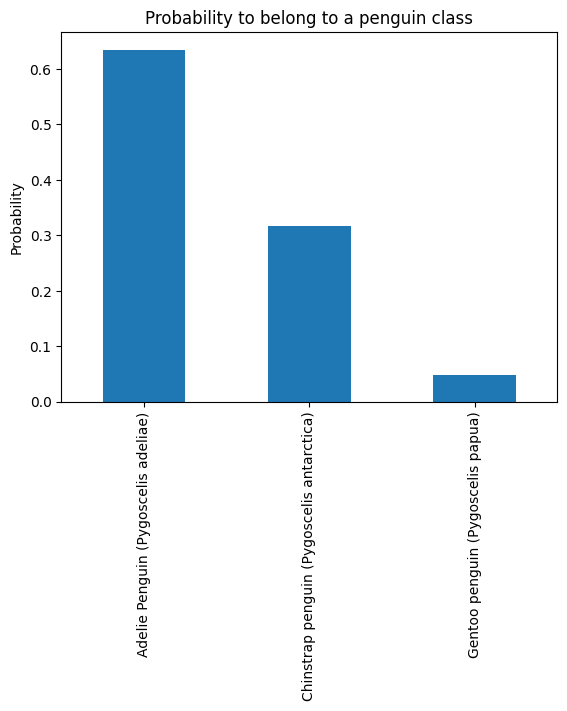

In [43]:
y_proba_class_0.plot.bar()
plt.ylabel("Probability")
_ = plt.title("Probability to belong to a penguin class")

We can also compute the different probabilities manually directly from the
tree structure.

También podemos calcular las diferentes probabilidades manualmente directamente desde la estructura del árbol.

In [44]:
adelie_proba = 103 / 161
chinstrap_proba = 52 / 161
gentoo_proba = 6 / 161
print(
    "Probabilities for the different classes:\n"
    f"Adelie: {adelie_proba:.3f}\n"
    f"Chinstrap: {chinstrap_proba:.3f}\n"
    f"Gentoo: {gentoo_proba:.3f}\n"
)

Probabilities for the different classes:
Adelie: 0.640
Chinstrap: 0.323
Gentoo: 0.037



It is also important to note that the culmen length has been disregarded for
the moment. It means that regardless of its value, it is not used during the
prediction.

También es importante señalar que la longitud del culmen no se ha tenido en cuenta por el momento, lo que significa que, independientemente de su valor, no se utiliza durante la predicción.

In [45]:
test_penguin_3 = pd.DataFrame(
    {"Culmen Length (mm)": [10_000], "Culmen Depth (mm)": [17]}
)
tree.predict_proba(test_penguin_3)

array([[0.63529412, 0.31764706, 0.04705882]])

Going back to our classification problem, the split found with a maximum depth
of 1 is not powerful enough to separate the three species and the model
accuracy is low when compared to the linear model.

Volviendo a nuestro problema de clasificación, la división encontrada con una profundidad máxima de 1 no es lo suficientemente potente para separar las tres especies y la precisión del modelo es baja en comparación con el modelo lineal.

In [46]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.77


Indeed, it is not a surprise. We saw earlier that a single feature is not able
to separate all three species: it underfits. However, from the previous
analysis we saw that by using both features we should be able to get fairly
good results.

In the next exercise, you will increase the tree depth to get an intuition on
how such a parameter affects the space partitioning.

De hecho, no es una sorpresa. Vimos anteriormente que una sola característica no es capaz de separar las tres especies: se ajusta por debajo de la media. Sin embargo, a partir del análisis anterior vimos que al usar ambas características deberíamos poder obtener resultados bastante buenos.

En el próximo ejercicio, aumentará la profundidad del árbol para tener una idea de cómo dicho parámetro afecta la partición del espacio.